<h1 align="center">Mathematical Methods In Engineering - 25872</h1>
<h4 align="center">Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Fall 2023</h4>
<h4 align="center">Python Assignment 3</h4>
<h5 align="center"><font color="cyan"> Feel free to contact TA team for any possible questions about the assignment </font>
 </h5>
<h5 align="center"> <font color="cyan"> Questions 1,2: @mh_momeni  -  Question 2,3: @Mahdi_h721 </font> </h5>


You should write your code in the <font color='green'>Code Cell</font> and then run the <font color='green'>Evaluation Cell</font> to check the correctness of your code.<br>
<font color='red'>**Please do not edit the codes in the Evaluation Cells.**</font>

##  Q1. Implementing QR Factorization <sub><sup>``(40 pt.)``</sup></sub>

>In this question, we are going to use QR factorization in computing eigenvalues. It is an important building block in numerical linear algebra. Recall that for any matrix $A$
, $A=QR$
 where $Q$
 is orthogonal and $R$
 is upper-triangular.

 **Reminder**: The QR algorithm, uses the QR decomposition, but don't confuse the two.

In [1]:
import numpy as np
np.set_printoptions(suppress=True, precision=4)

In [66]:
n = 5
A = np.random.rand(n,n)
npQ, npR = np.linalg.qr(A)
print(npQ)
print(npR)

[[-0.7868  0.1524 -0.4512  0.3525  0.1727]
 [-0.4107 -0.0631  0.3459 -0.035  -0.8405]
 [-0.0942 -0.9172  0.1607  0.3096  0.1681]
 [-0.3895 -0.1972  0.0378 -0.8615  0.2565]
 [-0.2273  0.3045  0.8059  0.191   0.4118]]
[[-1.1242 -1.3445 -0.8018 -0.6198 -0.6891]
 [ 0.     -0.9472 -0.0744 -0.5404 -0.7334]
 [ 0.      0.      0.8854  0.8865  0.1971]
 [ 0.      0.      0.      0.2687 -0.0652]
 [ 0.      0.      0.      0.     -0.1532]]


Check that Q is orthogonal:


In [67]:
np.allclose(np.eye(n), npQ @ npQ.T), np.allclose(np.eye(n), npQ.T @ npQ)

(True, True)

Check that R is triangular

In [68]:
np.allclose(np.triu(npR), npR)

True

### Gram-Schmidt

#### Classical Gram-Schmidt (unstable)

For each $j$
, calculate a single projection

$$v_j=P_ja_j$$

where $P_j$
 projects onto the space orthogonal to the span of $q_1,…,q_{j−1}$
.

In [6]:
def cgs(A):
    m, n = A.shape
    Q = np.zeros([m, n], dtype=np.float64)
    R = np.zeros([n, n], dtype=np.float64)

    for j in range(n):
        v_j = A[:, j]
        for i in range(j):
            R[i, j] = np.dot(Q[:, i], A[:, j])
            v_j = v_j - R[i, j] * Q[:, i]
        R[j, j] = np.linalg.norm(v_j)
        Q[:, j] = v_j / R[j, j]

    return Q, R

In [7]:
Q, R = cgs(A)
np.allclose(A, Q @ R)

True

Check if Q is unitary:

In [8]:
np.allclose(np.eye(len(Q)), Q.dot(Q.T))

True

### Modified Gram-Schmidt (optional)

Classical (unstable) Gram-Schmidt: for each $j$
, calculate a single projection
$$v_j=P_ja_j$$
where $P_j$
 projects onto the space orthogonal to the span of $q_1,…,q_{j−1}$
.

Modified Gram-Schmidt: for each $j$
, calculate $j−1$
 projections
$$P_j=P_{⊥q_{j−1}⋯⊥q_2⊥q_1}$$

In [9]:
n = 3
A = np.random.rand(n,n).astype(np.float64)

In [10]:
def mgs(A):
    V = A.copy()
    m, n = A.shape
    Q = np.zeros([m, n], dtype=np.float64)
    R = np.zeros([n, n], dtype=np.float64)

    for j in range(n):
        for i in range(j):
            R[i, j] = np.dot(Q[:, i], V[:, j])
            V[:, j] = V[:, j] - R[i, j] * Q[:, i]
        R[j, j] = np.linalg.norm(V[:, j])
        Q[:, j] = V[:, j] / R[j, j]

    return Q, R

In [11]:
Q, R = mgs(A)
np.allclose(np.eye(len(Q)), Q.dot(Q.T.conj()))

True

In [12]:
np.allclose(A, np.matmul(Q,R))

True

### Classical vs Modified Gram-Schmidt

In this part, we want to construct a square matrix $A$ with random singular vectors and widely varying singular values spaced by factors of 2 between $2^{−1}$
 and $2^{−(n+1)}$

In [13]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

In [14]:
n = 100
U, X = np.linalg.qr(np.random.randn(n,n))   # set U to a random orthogonal matrix
V, X = np.linalg.qr(np.random.randn(n,n))   # set V to a random orthogonal matrix
S = np.diag(np.power(2,np.arange(-1,-(n+1),-1), dtype=float))  # Set S to a diagonal matrix w/ exp
                                                              # values between 2^-1 and 2^-(n+1)

In [32]:
A = np.matmul(U,np.matmul(S,V))
QC, RC = cgs(A)
QM, RM = mgs(A) # if you don't complete the mgs function, comment this line

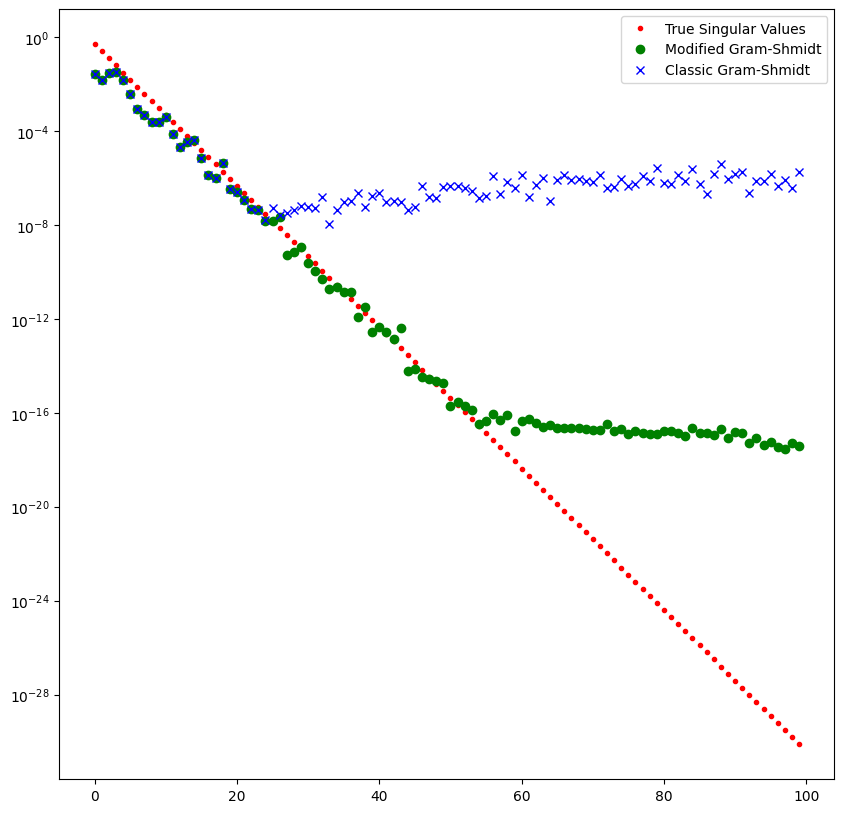

In [33]:
plt.figure(figsize=(10,10))
plt.semilogy(np.diag(S), 'r.', label="True Singular Values")
plt.semilogy(np.diag(RM), 'go', label="Modified Gram-Shmidt")
plt.semilogy(np.diag(RC), 'bx', label="Classic Gram-Shmidt")
plt.legend()
rcParams.update({'font.size': 18})

### Eigenvalue Decomposition using QR Factorization

Use the QR algorithm (or QR method) to get the eigenvalues of matrix $A$. Do 100 iterations, and print out the 1st, 5th, 10th, 20th and 100th iteration.

 **Reminder**: The QR algorithm (or QR method), uses the QR factorization, but don't confuse the two.

In [52]:
def qr_algorithm(A, iterations):
    n = A.shape[0]
    for i in range(iterations):
        Q, R = np.linalg.qr(A)
        A = R @ Q
        if i + 1 in [1, 5, 10, 20, 100]:
            print("\n --- Iteration", i + 1, "---")
            print(np.linalg.eig(A)[0])

In [54]:
A = np.array([1.0, -1.0, 0.0, 0.0, -1.0, 1.0, -1.0, 0.0, 0.0, -1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 3.0]).reshape((4, 4))
print("The matrix: \n", A)

print("\n --- Built-in ---")
print(np.linalg.eig(A)[0])
##Your Code start here
qr_algorithm(A, 100)
##Your Code ends here

The matrix: 
 [[ 1. -1.  0.  0.]
 [-1.  1. -1.  0.]
 [ 0. -1.  2.  0.]
 [ 0.  0.  0.  3.]]

 --- Built-in ---
[-0.247   1.445   2.8019  3.    ]

 --- Iteration 1 ---
[ 2.8019  1.445  -0.247   3.    ]

 --- Iteration 5 ---
[ 2.8019  1.445  -0.247   3.    ]

 --- Iteration 10 ---
[ 2.8019  1.445  -0.247   3.    ]

 --- Iteration 20 ---
[ 2.8019  1.445  -0.247   3.    ]

 --- Iteration 100 ---
[ 2.8019  1.445  -0.247   3.    ]


##  Q2. SVD & Image processing <sub><sup>``(30 pt.)``</sup></sub>

> In this question, we are going to investigate the use of SVD as a tool to obtain the basis of the matrix in digital image processing.
The first issue we will examine is image compression. For this purpose, in general, we can consider the information inside the image as a data matrix, then find a suitable basis for this information matrix and by depicting the primary matrix on the more important basis vectors and keeping the necessary information to show the initial image with less information.
This process results in image compression. It should be noted that for simplicity, the images we are examining in this exercise are in black and white.
>With the help of SVD, we can find a basis for the column space of the image matrix that we want, so that the columns of the image matrix have the highest correlation with the basis vectors.
>On the other hand, if these bases are considered in descending order of the size of the singular values, they will contain the most general information of the columns of the image, so by keeping only r initial columns of the found bases (U) along with the combined vectors (V) and the singular values (Σ) corresponding to them, we can retain the image's overall image with a good approximation.
>From an expert point of view, the reconstruction is actually a lower-order reconstruction of the primary matrix.
In this view, the value of r is the parameter to control the amount of compression we want.

###  part 1

In this part, the compression operation is performed on the input black and white image with the help of SVD analysis. One of the criteria for comparing the initial and final image is the PSNR criterion. Research about this criterion and draw the PSNR diagram in terms of different r. Then compare the results with the diagram by giving some test inputs and plotting the outputs.
One of the inputs you give to the function should be the image pic.jpg.

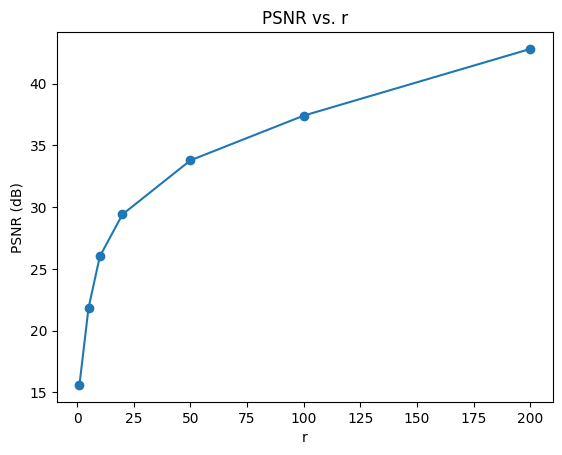

In [23]:
##Your Code start here
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def svd_image_compression(image_path, r_values):
    image = Image.open(image_path).convert('L')
    image_array = np.array(image)
    
    U, s, V = np.linalg.svd(image_array, full_matrices=False)
    psnr_values = []
    
    for r in r_values:
        reconstructed_image = np.dot(U[:, :r] * s[:r], V[:r, :])
        mse = np.mean((image_array - reconstructed_image) ** 2)
        psnr = 10 * np.log10(np.max(image_array) ** 2 / mse)
        psnr_values.append(psnr)
    
    plt.plot(r_values, psnr_values, '-o')
    plt.title('PSNR vs. r')
    plt.xlabel('r')
    plt.ylabel('PSNR (dB)')
    plt.show()

image_path = 'pic.jpg'
r_values = [1, 5, 10, 20, 50, 100, 200]
svd_image_compression(image_path, r_values)
##Your Code ends here

###  part 2

Another issue that we can explore with a similar idea of applying base transform is removing noise from images. In the condition that the noise in the image is uniform and in such a way that it does not distort the general information in the image. from the point of view of SVD, according to the examination of the general information, the direction of the image vector on bases with larger singular values has not changed much, and removing the information related to Examining general information to vectors with less importance can remove noise and keep the main information of the image.
In this part, add two different noises salt and pepper and Gaussian noise with a desired and appropriate range to the image pic.jpg so that the PSNR of both images is in the same range, then perform the noise reduction process with the help of SVD analysis.
For both noises, draw the PSNR diagram in terms of different r.
  Then compare the results with the graph by plotting a number of outputs.
  Which of the noises is more effective in this method?


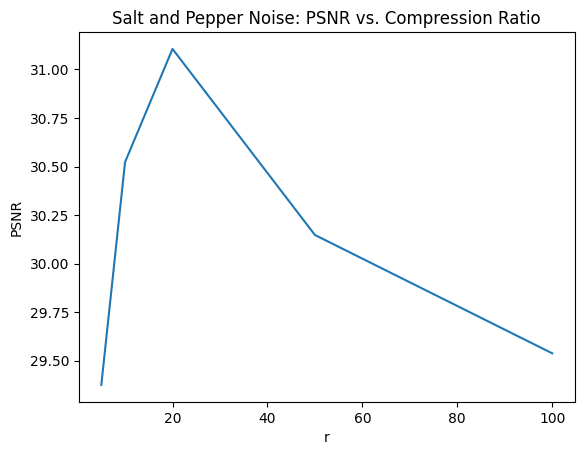

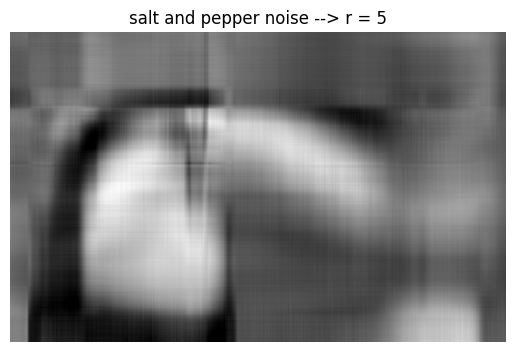

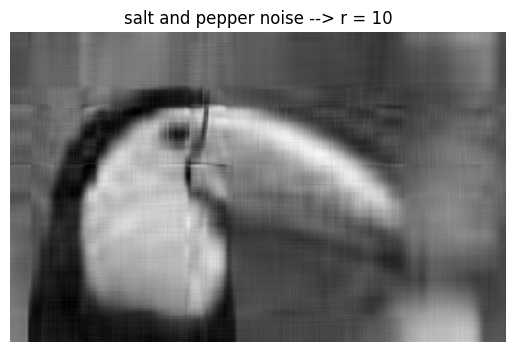

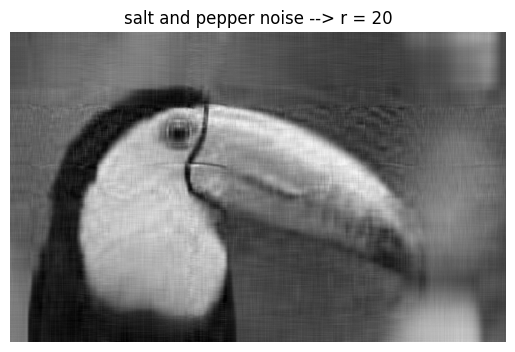

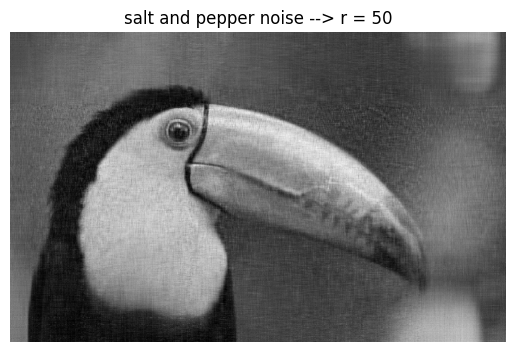

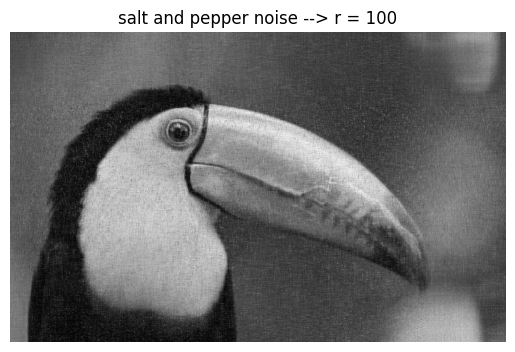

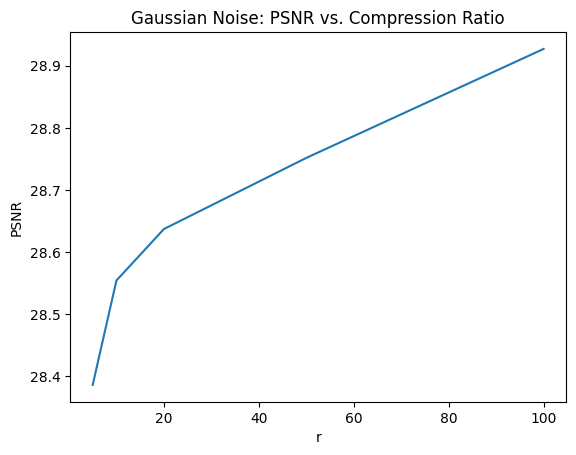

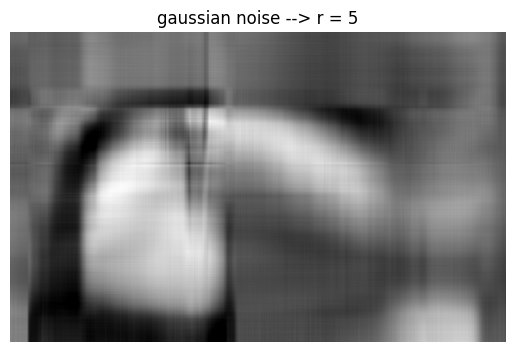

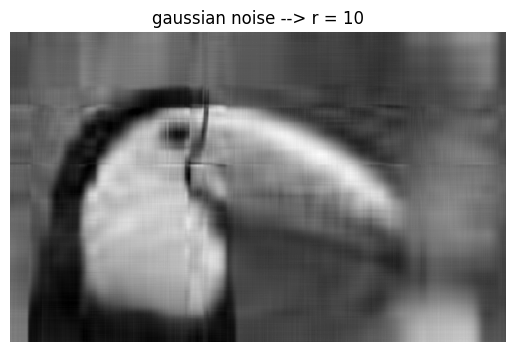

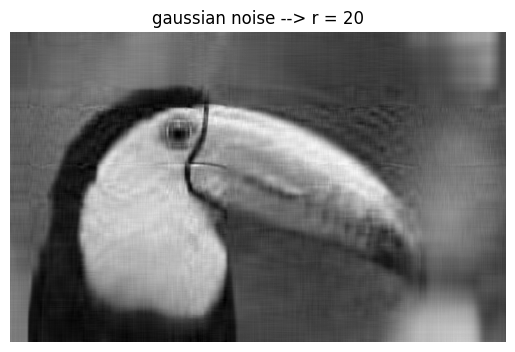

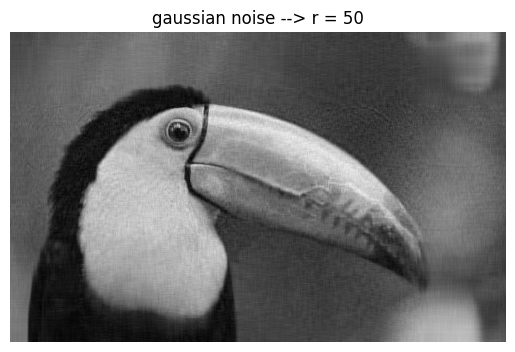

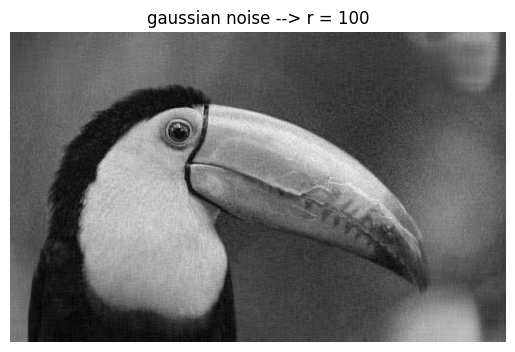

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def add_salt_and_pepper_noise(image_array, salt_prob, pepper_prob):
    noisy_image = np.copy(image_array)
    num_salt = int(image_array.size * salt_prob)
    num_pepper = int(image_array.size * pepper_prob)

    #salt noise
    coords = np.random.choice(image_array.size, num_salt, replace=False)
    noisy_image.ravel()[coords] = 255

    #pepper noise
    coords = np.random.choice(image_array.size, num_pepper, replace=False)
    noisy_image.ravel()[coords] = 0

    return noisy_image

def add_gaussian_noise(image_array, mean, std_dev):
    noise = np.random.normal(mean, std_dev, image_array.shape)
    noisy_image = np.clip(image_array + noise, 0, 255).astype(np.uint8)
    return noisy_image

def reduce_noise_with_svd(image_array, r_values):
    U, S, Vt = np.linalg.svd(image_array, full_matrices=False)

    psnr_values = []
    denoised_images = []

    for r in r_values:
        Sr = np.diag(S[:r])

        denoised_image = U[:, :r] @ Sr @ Vt[:r, :]
        denoised_image = np.clip(denoised_image, 0, 255).astype(np.uint8)

        mse = np.mean((image_array - denoised_image) ** 2)
        psnr = 20 * np.log10(255 / np.sqrt(mse))
        psnr_values.append(psnr)
        denoised_images.append(denoised_image)

    return psnr_values, denoised_images

image = Image.open('pic.jpg').convert('L')
image_array = np.array(image)
salt_prob = 0.02
pepper_prob = 0.02
noisy_image_salt_pepper = add_salt_and_pepper_noise(image_array, salt_prob, pepper_prob)

mean = 0
std_dev = 20
noisy_image_gaussian = add_gaussian_noise(image_array, mean, std_dev)

#test values
r_values = [5, 10, 20, 50, 100]

#Reduce noise - PSNR for salt and pepper noise
psnr_values_salt_pepper, denoised_images_salt_pepper = reduce_noise_with_svd(noisy_image_salt_pepper, r_values)

#Reduce noise - PSNR for Gaussian noise
psnr_values_gaussian, denoised_images_gaussian = reduce_noise_with_svd(noisy_image_gaussian, r_values)

#PSNR - salt and pepper noise
plt.plot(r_values, psnr_values_salt_pepper)
plt.xlabel('r')
plt.ylabel('PSNR')
plt.title('Salt and Pepper Noise: PSNR vs. Compression Ratio')
plt.show()

#denoised images - salt and pepper noise
for i, denoised_image in enumerate(denoised_images_salt_pepper):
    plt.imshow(denoised_image, cmap='gray')
    plt.axis('off')
    plt.title(f'salt and pepper noise --> r = {r_values[i]}')
    plt.show()

#PSNR - Gaussian noise
plt.plot(r_values, psnr_values_gaussian)
plt.xlabel('r')
plt.ylabel('PSNR')
plt.title('Gaussian Noise: PSNR vs. Compression Ratio')
plt.show()

#denoised images - Gaussian noise
for i, denoised_image in enumerate(denoised_images_gaussian):
    plt.imshow(denoised_image, cmap='gray')
    plt.axis('off')
    plt.title(f'gaussian noise --> r = {r_values[i]}')
    plt.show()

# The effectiveness of noise reduction using the SVD method can vary depending on the characteristics of the noise and the image itself.
# Generally, the SVD-based method is more effective in reducing Gaussian noise compared to salt and pepper noise.
# Salt and pepper noise typically manifests as random, isolated black and white pixels in the image.
# Since salt and pepper noise introduces high-intensity outliers, it can be challenging to completely remove them using SVD analysis.
# The noise reduction capability of SVD for salt and pepper noise is generally limited.
# On the other hand, Gaussian noise is characterized by a smooth distribution of random intensity variations. 
# The SVD-based method is more effective in capturing the general information of the image, including the underlying structure, and can help reduce Gaussian noise while preserving the important features of the image.
# Therefore, in terms of the SVD-based method, Gaussian noise is generally more effectively reduced compared to salt and pepper noise. 


##  Q3. PCA and Clustering <sub><sup>``(40 pt.)``</sup></sub>
In this problem we want to cluster some data points.
But first, you should reduce the number of features by the PCA algorithm then use kmeans clustering algorithm

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples

### Import Dataset

In [5]:
Datapoint = pd.read_csv('Datapoint.csv',header=None)

### Correlation Heatmap

In this part plot the correlation Heatmap of features.
what is your suggestion about the number of principal components that they have high variance? Explain why.

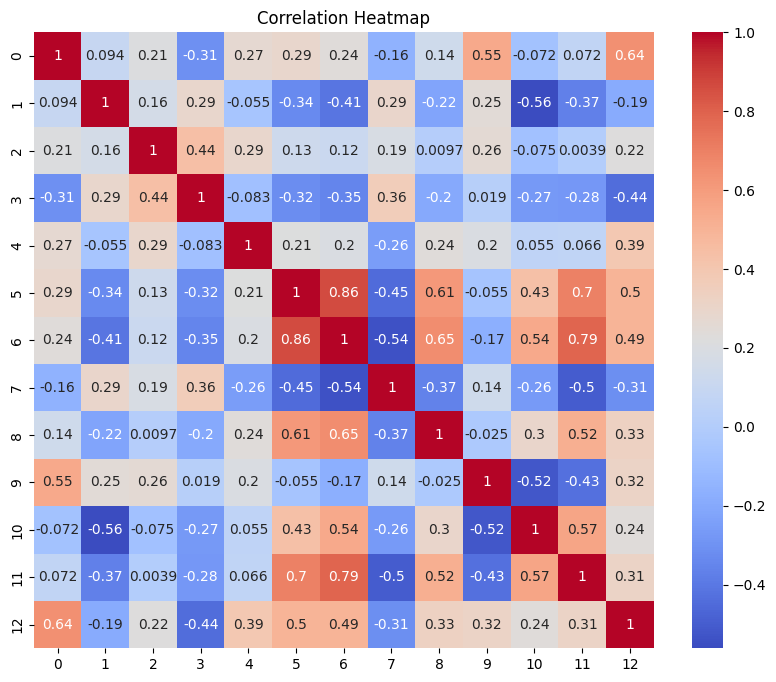

In [6]:
##Your Code start here
correlation_matrix = Datapoint.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
##Your Code ends here

###  Data Preprocessing

In [7]:
Datapoint.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### PCA (Principal Component Analysis)
> As you know for applying PCA we should scale our data points.Here we use MinMax and Standard Scaler.
(First, use Standard Scaler)

Calculate principal components and plot Explained variance by each component.

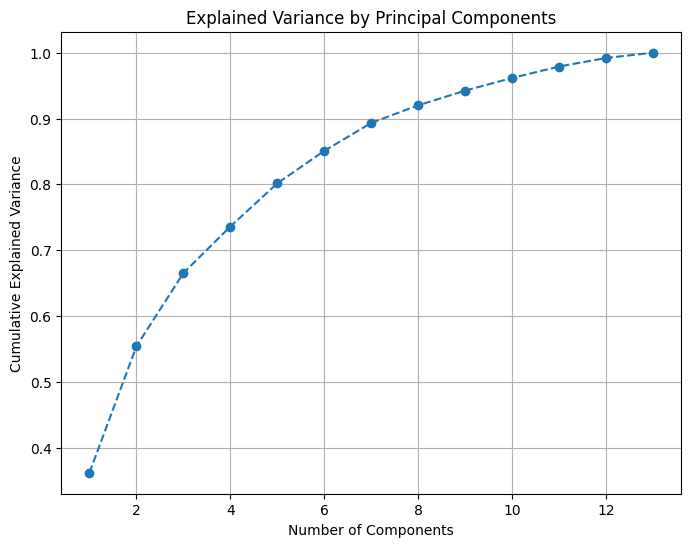

In [8]:
##Your Code start here

#standard_scaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Datapoint)
pca = PCA()
pca.fit(scaled_data)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()
##Your Code ends here

Apply PCA Algorithm from scratch and reduce the number of features to the number you have guessed in previous parts.

In [18]:
##Your Code start here
cov_matrix = np.cov(scaled_data.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
eigen_pairs = [(np.abs(eigenvalues[i]), eigenvectors[:, i]) for i in range(len(eigenvalues))]
eigen_pairs.sort(key=lambda x: x[0], reverse=True)
num_components = 7  
selected_eigenvectors = np.array([pair[1] for pair in eigen_pairs[:num_components]])
pca_std_datapoint = DataFrame(scaled_data.dot(selected_eigenvectors.T))
##Your Code ends here

### PCA plot in 2D
Plot data points using their two first features.What do you think about the number of clusters?

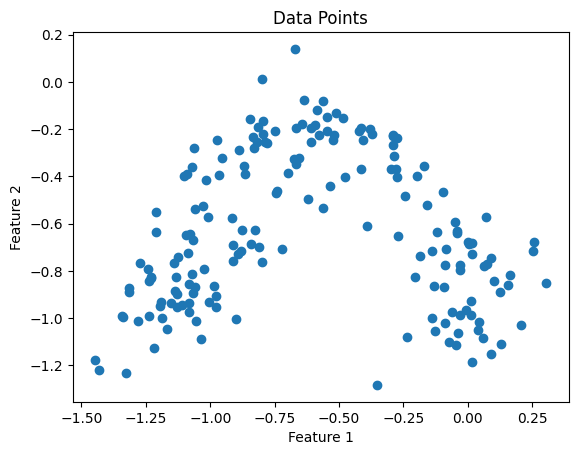

In [19]:
##Your Code start here
feature1 = pca_std_datapoint.iloc[:, 0]
feature2 = pca_std_datapoint.iloc[:, 1]

plt.scatter(feature1, feature2)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Data Points')
plt.show()


# Regarding the number of clusters, it's not possible to determine the appropriate number of clusters based solely on the two-dimensional scatter plot.
# The number of clusters is typically determined using clustering algorithms or by analyzing the underlying data patterns.

##Your Code ends here

### Do all previous steps for MinMax Scaling
Tell your opinion about diffrences.




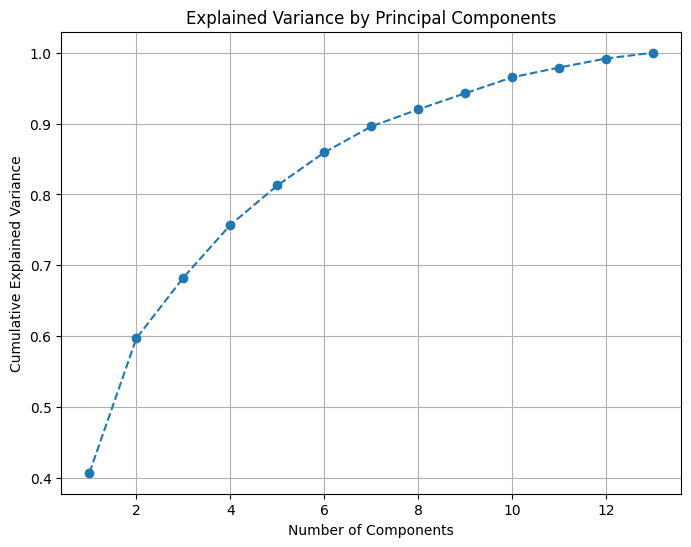

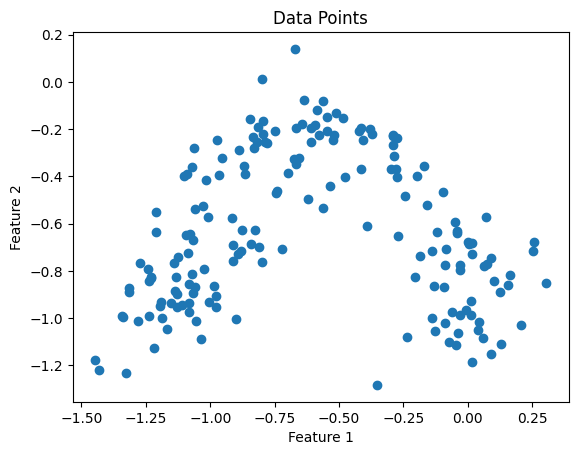

In [55]:
##Your Code start here
scaler = MinMaxScaler()
scaled_data_minmax = scaler.fit_transform(Datapoint)
pca = PCA()
pca.fit(scaled_data_minmax)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()

cov_matrix = np.cov(scaled_data_minmax.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
eigen_pairs = [(np.abs(eigenvalues[i]), eigenvectors[:, i]) for i in range(len(eigenvalues))]
eigen_pairs.sort(key=lambda x: x[0], reverse=True)
num_components = 10  
selected_eigenvectors = np.array([pair[1] for pair in eigen_pairs[:num_components]])
transformed_data_minmax = DataFrame(scaled_data_minmax.dot(selected_eigenvectors.T))

feature1 = transformed_data_minmax.iloc[:, 0]
feature2 = transformed_data_minmax.iloc[:, 1]

plt.scatter(feature1, feature2)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Data Points')
plt.show()

##Your Code ends here

### KMeans Clustering
#### Elbow Method for Determining Cluster Amount on  Dataset

Using the elbow method to find the optimal number of clusters

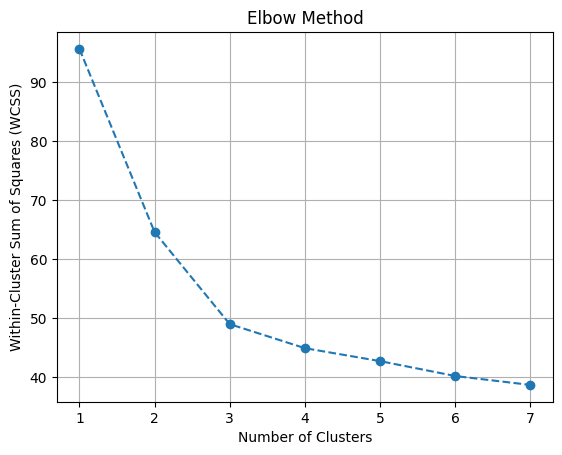

In [46]:
##Your Code start here
max_clusters = 7
wcss = []

for n_clusters in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the WCSS for different cluster numbers
plt.plot(range(1, max_clusters+1), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')
plt.grid(True)
plt.show()
##Your Code ends here

What is inertia and silhouette metrics?
Explain them briefly.




In [47]:
#You should save your final datapoints in pca_std_datapoint variable
inertia = []
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter= 500, random_state=17)
    kmeans.fit(pca_std_datapoint)
    inertia.append(kmeans.inertia_)


# Inertia measures the compactness or coherence of the clusters.
# It calculates the sum of squared distances between each data point and its centroid within the cluster.
# The goal of clustering algorithms, such as K-means, is to minimize the inertia.
# Lower inertia values indicate tighter and more compact clusters.

100%|██████████| 8/8 [00:00<00:00, 42.70it/s]


In [48]:
silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter=500, random_state=17)
    kmeans.fit(pca_std_datapoint)
    silhouette[i] = sil(pca_std_datapoint, kmeans.labels_, metric='euclidean')

# The Silhouette score measures how well each data point fits into its assigned cluster.
# It combines both the cohesion (how close a data point is to its own cluster) and the separation (how far it is from other clusters) of the data point.
# The Silhouette score ranges from -1 to 1, where higher values indicate better clustering results.
# A score close to +1 suggests that the data point is well-clustered, while a score close to 0 indicates overlapping or ambiguous clusters.
# Negative scores indicate that the data point may be assigned to the wrong cluster.

100%|██████████| 8/8 [00:00<00:00, 38.97it/s]


Plot the **inertia** and **silhouette ** values

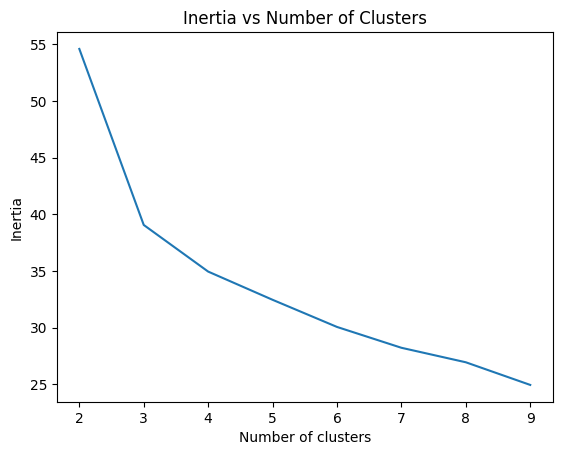

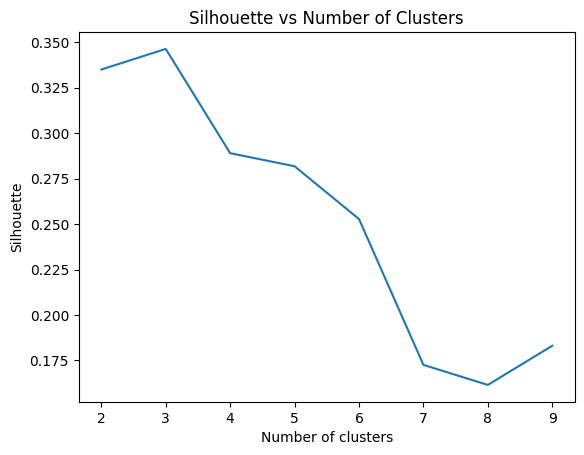

In [49]:
##Your Code start here
# Plotting silhouette values
plt.plot(range(2, 10), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Inertia vs Number of Clusters')
plt.show()

# Plotting silhouette values
plt.plot(list(silhouette.keys()), list(silhouette.values()))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette')
plt.title('Silhouette vs Number of Clusters')
plt.show()
##Your Code ends here

Tune the hyper parameters based on your conclusions.

In [50]:
model_kmeans = KMeans(n_clusters=10, random_state=0, init='k-means++')
y_predict_kmeans1 = model_kmeans.fit_predict(pca_std_datapoint)


#Now plot the datapoints usig two first features
(Each cluster in a different colour)

In [ ]:
features = DataFrame(y_predict_kmeans1).iloc[:, :2]

# Plotting the data points
plt.scatter(features.iloc[:, 0], features.iloc[:, 1])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Data Points')
plt.show()

Do all previous steps for MinMax scaled data points.





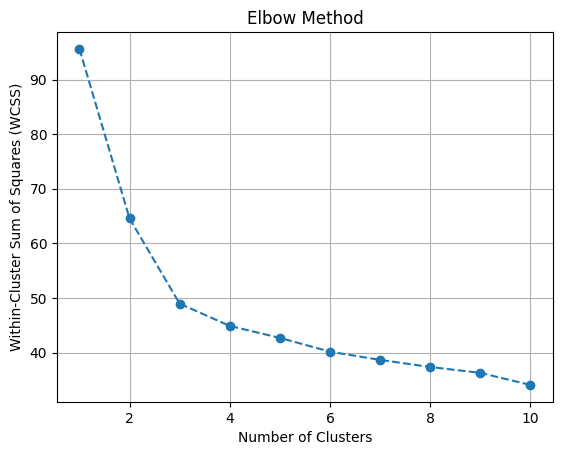

100%|██████████| 8/8 [00:00<00:00, 39.15it/s]


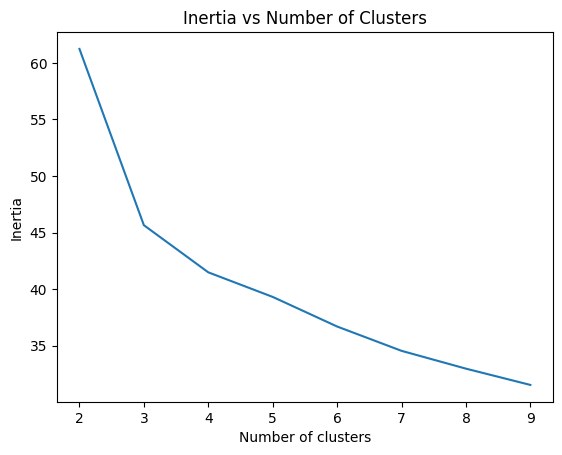

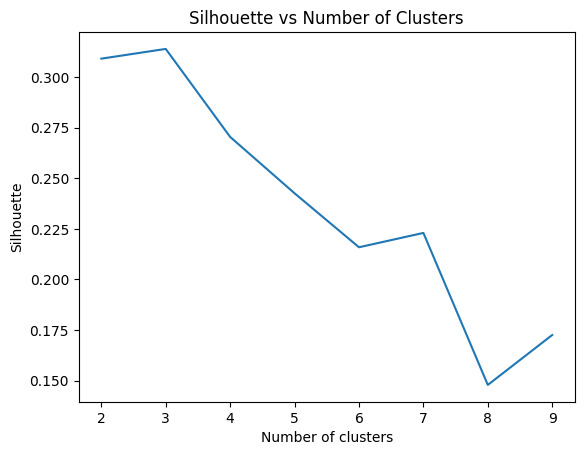

In [65]:
max_clusters = 10
wcss = []

for n_clusters in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_data_minmax)
    wcss.append(kmeans.inertia_)

# Plot the WCSS for different cluster numbers
plt.plot(range(1, max_clusters+1), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

inertia = []
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter= 500, random_state=17)
    kmeans.fit(transformed_data_minmax)
    inertia.append(kmeans.inertia_)

silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter=500, random_state=17)
    kmeans.fit(transformed_data_minmax)
    silhouette[i] = sil(transformed_data_minmax, kmeans.labels_, metric='euclidean')

# Plotting silhouette values
plt.plot(range(2, 10), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Inertia vs Number of Clusters')
plt.show()

# Plotting silhouette values
plt.plot(list(silhouette.keys()), list(silhouette.values()))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette')
plt.title('Silhouette vs Number of Clusters')
plt.show()

model_kmeans = KMeans(n_clusters=10, random_state=0, init='k-means++')
y_predict_kmeans1 = model_kmeans.fit_predict(transformed_data_minmax)

features = DataFrame(y_predict_kmeans1).iloc[:, :2]

# Plotting the data points
# plt.scatter(features.iloc[:, 0], features.iloc[:, 1])
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.title('Data Points')
# plt.show()

Compare the results of different scaling methods in a PCA problem

$$answer:$$

Standardization scales the data to have zero mean and unit variance. This scaling method is suitable when the data distribution is approximately Gaussian.

Min-Max Scaling scales the data to a specific range, typically between 0 and 1. It preserves the relative relationships between the data points and is suitable when the data distribution does not necessarily follow a Gaussian distribution.